# Project 1 #
## Predicting NHL players position based on their overall pick, points, and games played ##
## By Adam White and Connor Hudziak ##

In this project, we used data from kaggle (https://www.kaggle.com/datasets/mattop/nhl-draft-hockey-player-data-1963-2022) on nhl players to predict the position they play based on a number of different vraiables. In the NHL, players score points by scoring goals and assists, so for example, a player who scores a goal and an assist in a game scores 2 points. In general forwards score more goals than defenders, however assists are scored by both positions at a high rate. Our project focuses on determining whether a model can be made to predict a players position given the points they have scored.





In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn


In [357]:
# data from https://www.kaggle.com/datasets/mattop/nhl-draft-hockey-player-data-1963-2022 
data = pd.read_csv("C:/Users/adamw/Downloads/250 NOTEBOOKS/nhldraft.csv")
data.head()

,id,year,overall_pick,team,player,nationality,position,age,to_year,amateur_team,...,points,plus_minus,penalties_minutes,goalie_games_played,goalie_wins,goalie_losses,goalie_ties_overtime,save_percentage,goals_against_average,point_shares
0,1,2022,1,Montreal Canadiens,Juraj Slafkovsky,SK,LW,18.0,NaN,TPS (Finland),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2022,2,New Jersey Devils,Simon Nemec,SK,D,18.0,NaN,HK Nitra (Slovakia),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2022,3,Arizona Coyotes,Logan Cooley,US,C,18.0,NaN,USA U-18 Development Team (USDP/USHL),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2022,4,Seattle Kraken,Shane Wright,CA,C,18.0,NaN,Kingston Frontenacs (OHL),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2022,5,Philadelphia Flyers,Cutter Gauthier,SE,LW,18.0,NaN,USA U-18 Development Team (USDP/USHL),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [358]:
data.drop(['plus_minus', 'penalties_minutes', 'goalie_games_played', 'goalie_wins', 'goalie_losses', 
          'goalie_ties_overtime', 'save_percentage', 'goals_against_average', 'point_shares','age','to_year'],axis=1, inplace=True)


In [359]:
data.isna().sum()

id                 0
year               0
overall_pick       0
team               1
player             0
nationality        4
position          27
amateur_team       0
games_played    7004
goals           7004
assists         7004
points          7004
dtype: int64

In [360]:
data = data.dropna(subset=['points'])

## Turning position into 0 and 1 ##
Here we are going to convert the position labels into either 0 or 1 based on whether they are classified by forward or defense players. Forwards are players in the C (Center), LW (Left Wing), RW (Right Wing) positions. The forwards will be classified with a 0 and the rest with a D (Defenseman) will be represented with a 1. We created a new 'Positions' column to account for this representation and drop the 'D' and 'F' that was previously represented. 


In [361]:
data['C'] = np.uint8(data.position== 'C')
data['LW'] = np.uint8(data.position=='LW')
data['RW'] = np.uint8(data.position=='RW')
data['D'] = np.uint8(data.position=='D')
data.D.sum()


1603

In [362]:
data["F"] = (data["C"] + data["LW"] + data["RW"]).astype("int")
data.drop(['C','LW','RW'], axis=1, inplace = True)
data.F.sum()

3017

In [363]:
data["Position"] = (data["D"]).astype("int")
data.drop(['D','F'], axis=1, inplace = True)

In [364]:
data.head(20)

,id,year,overall_pick,team,player,nationality,position,amateur_team,games_played,goals,assists,points,Position
225,226,2021,1,Buffalo Sabres,Owen Power,CA,D,Michigan (Big Ten),8.0,2.0,1.0,3.0,1
226,227,2021,2,Seattle Kraken,Matthew Beniers,US,C,Michigan (Big Ten),10.0,3.0,6.0,9.0,0
227,228,2021,3,Anaheim Ducks,Mason Mctavish,CH,C,Peterborough Petes (OHL),9.0,2.0,1.0,3.0,0
229,230,2021,5,Columbus Blue Jackets,Kent Johnson,CA,C,Michigan (Big Ten),9.0,0.0,3.0,3.0,0
231,232,2021,7,San Jose Sharks,William Eklund,SE,LW,Djurgardens IF (Sweden),9.0,0.0,4.0,4.0,0
235,236,2021,12,Columbus Blue Jackets,Cole Sillinger,US,C,Sioux Falls Stampede (USHL),79.0,16.0,15.0,31.0,0
283,284,2021,60,Arizona Coyotes,Janis Moser,CH,D,EHC Biel-Bienne (Swiss),43.0,4.0,11.0,15.0,1
448,449,2020,1,New York Rangers,Alexis Lafreniere,CA,LW,Rimouski Oceanic (QMJHL),135.0,31.0,21.0,52.0,0
449,450,2020,2,Los Angeles Kings,Quinton Byfield,CA,C,Sudbury Wolves (OHL),46.0,5.0,6.0,11.0,0
450,451,2020,3,Ottawa Senators,Tim Stützle,DE,LW,Adler Mannheim (Germany),132.0,34.0,53.0,87.0,0


## Correlation Heatmap ##
This correlation heat map makes clear some obvious relationships between our variables. The amount of games a player plays has a very large impact on the number of points they end up scoring. There is also a negative correlation between overall pick and points scored, this makes sense considering players picked earlier are considered to be better players with a high chance of playing more. Most interestingly, there is very little correlation between position and points.

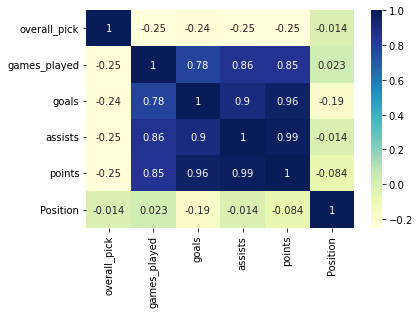

In [365]:
data.drop(['team','nationality', 'amateur_team','position', 'player', 'id', 'year'], axis=1, inplace = True)
dataplot = sn.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [366]:
data.drop(['goals','assists'], axis=1, inplace = True)


## Bar chart 1 ##
We will now create a bar chart that shows the total amount of forwards and defensemen that are represented in our data. This includes all players drafted that have played at least a game in the NHL.


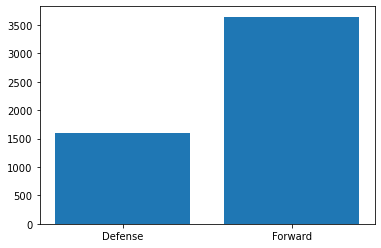

In [367]:
plt.bar(['Defense','Forward'],[data.Position.sum(),len(data)-data.Position.sum()])
plt.show()


In [381]:
data = data[data['points'] >= 50 ] 
data = data[data['games_played'] >= 100 ] 

## Scatter plot ##
The Scatter plot below shows the relationship between the overall pick between 1 and an estimated 300 depending on the year of the draft. We have also accounted for players that were drafted and have not played an NHL game or have a low number of points. In our model we will use players that were drafted and have earned 50 or more points and have played at least 100 or more NHL games.


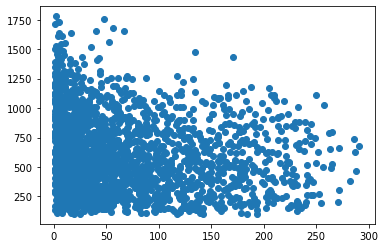

In [383]:
plt.scatter(data.overall_pick, data.games_played)

In [370]:
labels = np.array(data.Position)

## Filtering Data ##
Here we set a requirement for players to have played at least 100 games and scored at least 50 points. This should help reduce some of the error in our model as it would be hard for the model to predict a player's position if they have only played a few games in the NHL and scored few if any points. This is a very common scenario as many players play only a few games, so this does mean a large amount of our data is being cut


In [371]:
new_data = data[data['points'] >= 50 ] 
new_data = data[data['games_played'] >= 100 ] 

## Bar Chart 2 ## 
Below is an updated bar chart with the amount of defensemen and forwards who were drafted and have played at least a 100 or more games and have earned 50 or more points in the NHL.


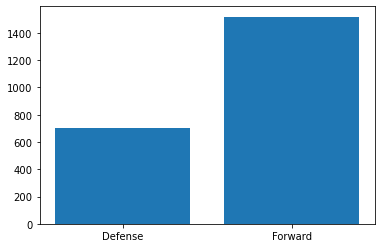

In [372]:
plt.bar(['Defense','Forward'],[new_data.Position.sum(),len(new_data)-new_data.Position.sum()])
plt.show()

In [373]:
vc = data['Position'].value_counts()
vc

0    1519
1     704
Name: Position, dtype: int64

In [374]:
data = data.dropna()
data.drop(['Position'], axis=1, inplace = True)

In [375]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
data.head()

,overall_pick,games_played,points
448,1,135.0,52.0
450,3,132.0,87.0
664,1,166.0,108.0
665,2,157.0,58.0
666,3,152.0,59.0


In [376]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial',max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=0)

## Logistic Regression Model ##
Our logistic regression model has a score of 76.18%, which is a relatively high score consdiering some of the challanges of the data set and structure.

In [377]:
print(model.score(X_test, y_test))

0.7617977528089888


<AxesSubplot:>

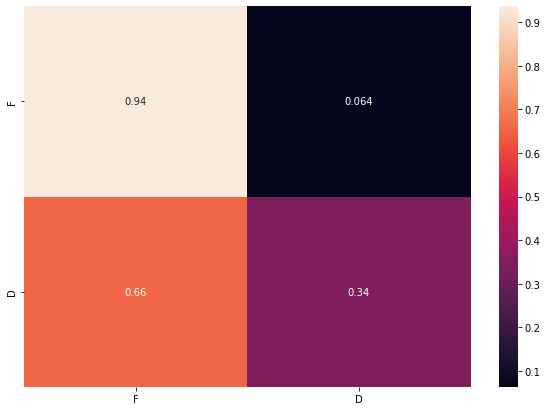

In [384]:
import seaborn as sn
numClasses = 2
labels = ['F','D']
conf = np.zeros([numClasses,numClasses])
guesses = model.predict(X_test)

for Position in range(len(y_test)):
    real = y_test[Position]
    guess = guesses[Position]
    conf[real,guess] = conf[real,guess] + 1
 
rowsums = np.sum(conf,1)
rowsums = np.reshape(rowsums,[numClasses,1])
rowsums = np.repeat(rowsums,numClasses, axis = 1)
conf = conf / rowsums
df_cm = pd.DataFrame(conf, index = [i for i in labels],
                  columns = [i for i in labels])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

## Confusion Matrix Results ##
Our confusion matrix shows that the model is good at predicting forwards, with a 94% success rate, but poor at predicting defenders with only a 34% success rate. The model clearly skews towards classifying players as forwards, which could be caused by a few things. Part of problem is the number of forwards that met the predetermined requirements of games played and points doubles the number of defenders that meet these requirements. Another issue is the similarities between the two positions point totals. Since there is not a position that clearly scores more points than another, the classifier can look at a player thats played 200 games and scored 75 points and it is entirely reasonable for this to be either a defender or a forward. Perhaps a project which includes a requirement that could reduce the spread in values between forwards and defenders could create a more accurate classifier. This could for example be a requirement for average time on ice  (a stat not included in this dataset) which skews more towards defenders.